This notebook demonstrates the use of [CREIME](https://doi.org/10.1029/2022JB024595) for earthquake detection and magnitude estimation.

## (1) Testing on STEAD Dataset

### $(\mathrm{i})$ Loading the data
For more information on using this dataset refer to example 01.

In [1]:
#import sys
#sys.path.insert(0, '..')
from saipy.data.base import STEAD
stead = STEAD(directory = '/home/seismoai/data')
print(stead)

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise,109C.TA_201510210555_NO
1,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise,109C.TA_201511061450_NO
2,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise,109C.TA_201511070220_NO
3,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise,109C.TA_201511140515_NO
4,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise,109C.TA_201512251850_NO


Dataset containing 1265657 seismological waveforms.
Metadata: Available
Waveform data: Available


### $(\mathrm{ii})$ Getting Data and Labels in the format for CREIME

In [2]:
X, y = stead.get_creime_data(stead.trace_list()[-20:]) ####we use only the last 20 traces here, to make the experiment fast

100%|██████████| 20/20 [00:00<00:00, 120.29it/s]


In [3]:
X.shape,y.shape

((17, 512, 3), (17, 512))

In [4]:
from saipy.utils.visualizations import plot_creime_data

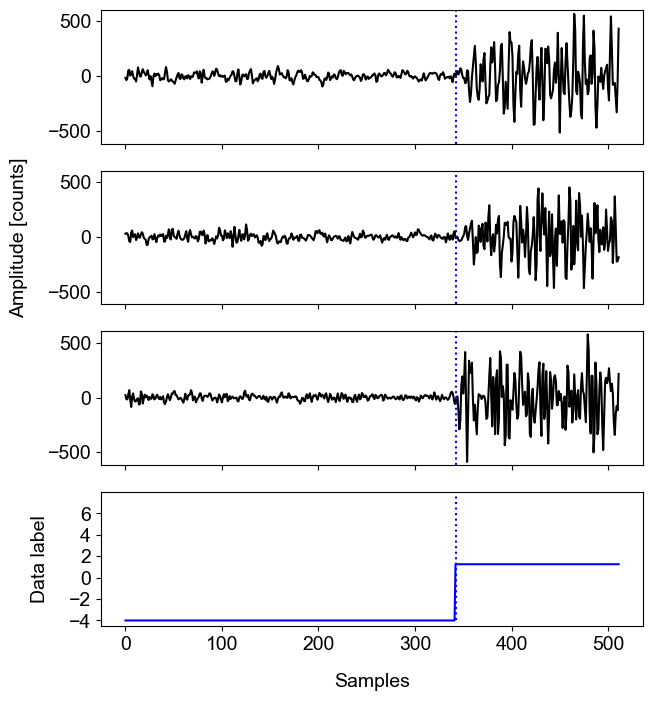

In [5]:
plot_creime_data(X[15], y[15])

### $(\mathrm{iii})$ Loading CREIME

In [6]:
from saipy.models.creime import CREIME
import os  
model_path = '../saipy/saved_models/'
creime = CREIME(model_path)
print(creime)

2025-05-25 20:14:16.207981: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-05-25 20:14:16.208025: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: geralt
2025-05-25 20:14:16.208030: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: geralt
2025-05-25 20:14:16.208131: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 460.91.3
2025-05-25 20:14:16.208146: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 460.91.3
2025-05-25 20:14:16.208150: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 460.91.3
2025-05-25 20:14:16.208404: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in perf

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 512, 3)]          0         
                                                                 
 conv1d_51 (Conv1D)          (None, 512, 32)           1568      
                                                                 
 max_pooling1d_51 (MaxPoolin  (None, 128, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_52 (Conv1D)          (None, 128, 16)           8208      
                                                                 
 max_pooling1d_52 (MaxPoolin  (None, 32, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_53 (Conv1D)          (None, 32, 8)             205

In [7]:
y_pred, predictions = creime.predict(X)

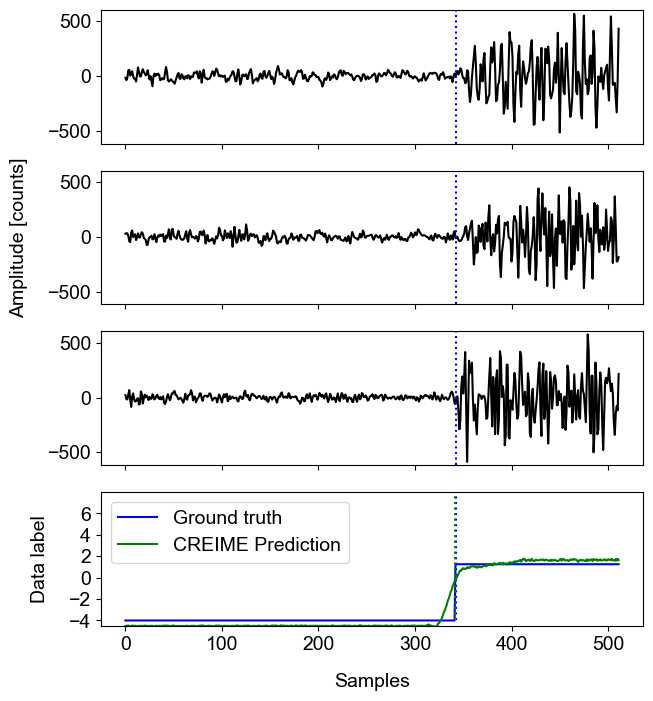

In [8]:
plot_creime_data(X[15], y[15], y_pred[15])

In [9]:
predictions

[(1, 1.3, 323),
 (1, 1.5, 357),
 (1, 1.6, 397),
 (1, 1.7, 392),
 (1, 1.5, 406),
 (1, 2.5, 404),
 (1, 3.0, 393),
 (1, 1.5, 382),
 (1, 2.4, 389),
 (1, 1.7, 345),
 (1, 1.3, 365),
 (1, 1.4, 322),
 (1, 1.2, 378),
 (1, 1.8, 339),
 (1, 2.1, 393),
 (1, 1.7, 341),
 (1, 1.6, 399)]

Alternatively

In [10]:
model = creime.get_model()

In [11]:
y_pred = model.predict(X)

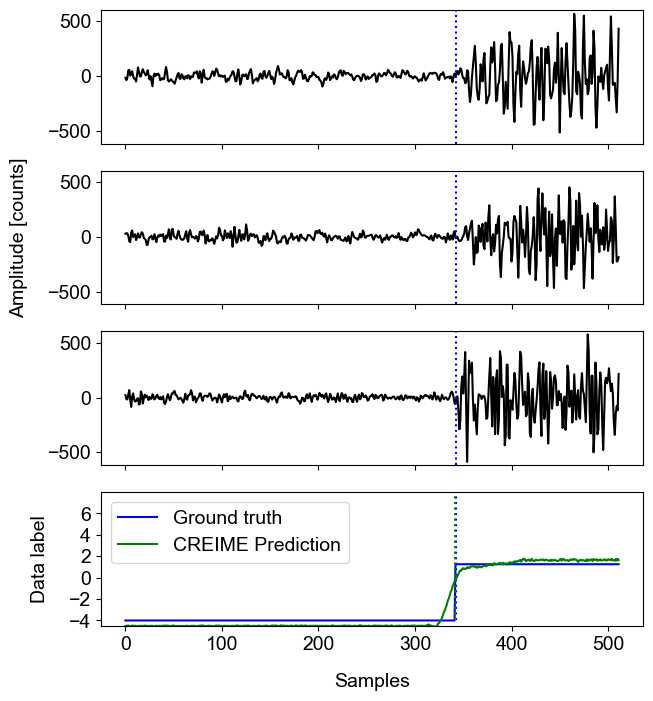

In [12]:
plot_creime_data(X[15], y[15], y_pred[15])

## (2) Testing on INSTANCE Dataset

### $(\mathrm{i})$ Loading the data
For more information on using this dataset refer to example 01.

In [13]:
#import sys
#sys.path.insert(0, '..')
from saipy.data.base import INSTANCE
instance = INSTANCE(directory = '/home/seismoai/data')
print(instance)

,source_id,station_network_code,station_code,station_location_code,station_channels,station_latitude_deg,station_longitude_deg,station_elevation_m,station_vs_30_mps,station_vs_30_detail,...,trace_Z_upper_quartile_counts,trace_E_spikes,trace_N_spikes,trace_Z_spikes,trace_name,trace_GPD_P_number,trace_GPD_S_number,trace_EQT_number_detections,trace_EQT_P_number,trace_EQT_S_number
0,20050103T055721,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,60.0,0.0,0.0,0.0,20050103T055721.MN.CUC..HH,0,1,0.0,0.0,0.0
1,20050107T055514,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,70.0,0.0,0.0,0.0,20050107T055514.MN.CUC..HH,0,0,0.0,0.0,0.0
2,20050110T014724,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,35.0,0.0,0.0,0.0,20050110T014724.MN.CUC..HH,0,0,0.0,0.0,0.0
3,20050115T171350,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,71.0,0.0,0.0,0.0,20050115T171350.MN.CUC..HH,0,2,0.0,0.0,0.0
4,20050116T210022,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,190.0,0.0,0.0,0.0,20050116T210022.MN.CUC..HH,0,1,0.0,0.0,0.0


,source_id,station_network_code,station_code,station_location_code,station_channels,station_latitude_deg,station_longitude_deg,station_elevation_m,station_vs_30_mps,station_vs_30_detail,...,trace_sa03_cmps2,trace_sa10_cmps2,trace_sa30_cmps2,trace_name,trace_GPD_P_number,trace_GPD_S_number,trace_EQT_number_detections,trace_EQT_P_number,trace_EQT_S_number,trace_deconvolved_units
0,10000541,MN,AQU,NaN,HH,42.35400,13.40500,710.0,485.0,Vs30 extracted from ShakeMap,...,0.000812,0.000071,0.000019,10000541.MN.AQU..HH,1.0,1.0,1.0,1.0,1.0,mps
1,10000541,MN,AQU,NaN,HL,42.35400,13.40500,710.0,485.0,Vs30 extracted from ShakeMap,...,0.000836,0.000135,0.000050,10000541.MN.AQU..HL,NaN,NaN,NaN,NaN,NaN,mps2
2,10000541,IV,ARRO,NaN,EH,42.57917,12.76567,253.0,549.0,Vs30 extracted from ShakeMap,...,0.000871,0.000046,0.000022,10000541.IV.ARRO..EH,2.0,1.0,1.0,1.0,1.0,mps
3,10000541,IV,ASSB,NaN,HH,43.04260,12.65870,734.0,412.0,Vs30 extracted from ShakeMap,...,0.001400,0.000068,0.000015,10000541.IV.ASSB..HH,1.0,7.0,1.0,1.0,1.0,mps
4,10000541,IV,ATCC,NaN,EH,43.18514,12.63994,557.0,667.0,Vs30 extracted from ShakeMap,...,0.001339,0.000057,0.000028,10000541.IV.ATCC..EH,1.0,3.0,1.0,1.0,1.0,mps


INSTANCE Dataset


### $(\mathrm{ii})$ Getting Data and Labels in the format for CREIME

In [14]:
X, y = instance.get_creime_data(traces_n = instance.trace_list_noise()[-10:], traces_ev = instance.trace_list_events()[-10:])

100%|██████████| 10/10 [00:00<00:00, 1519.73it/s]
/home/seismoai/data/GNSS_Chile_Syn/SAIPy_tests/SAIPy_venv/lib/python3.8/site-packages/saipy/data/base.py:321: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  p_arr = int(self.metadata_ev[self.metadata_ev['trace_name'] == evi]['trace_P_arrival_sample'])
/home/seismoai/data/GNSS_Chile_Syn/SAIPy_tests/SAIPy_venv/lib/python3.8/site-packages/saipy/data/base.py:330: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y[t0:] = y[t0:] * -0.25 * float(self.metadata_ev[self.metadata_ev['trace_name'] == evi]['source_magnitude'])

100%|██████████| 10/10 [00:01<00:00,  7.38it/s]


In [15]:
X.shape,y.shape

((20, 512, 3), (20, 512))

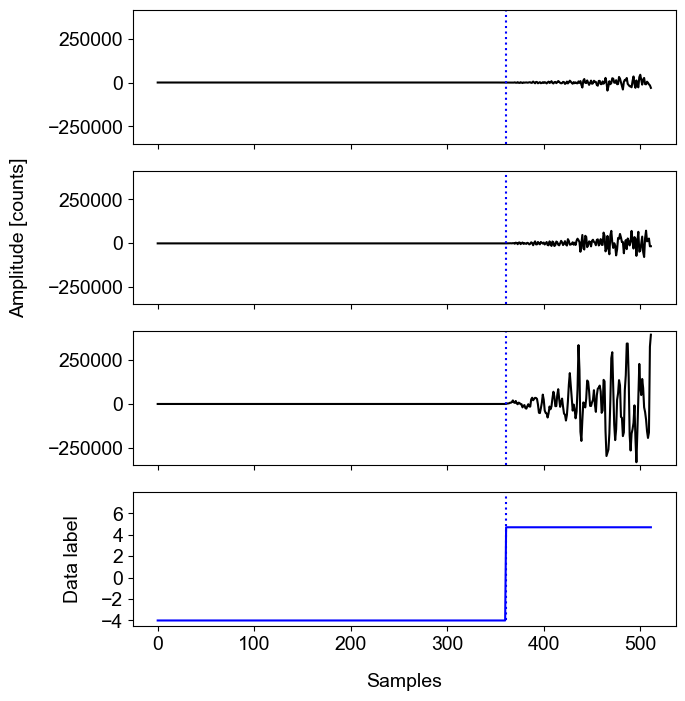

In [16]:
plot_creime_data(X[12], y[12])

### $(\mathrm{iii})$ Testing CREIME

In [17]:
y_pred, predictions = creime.predict(X)

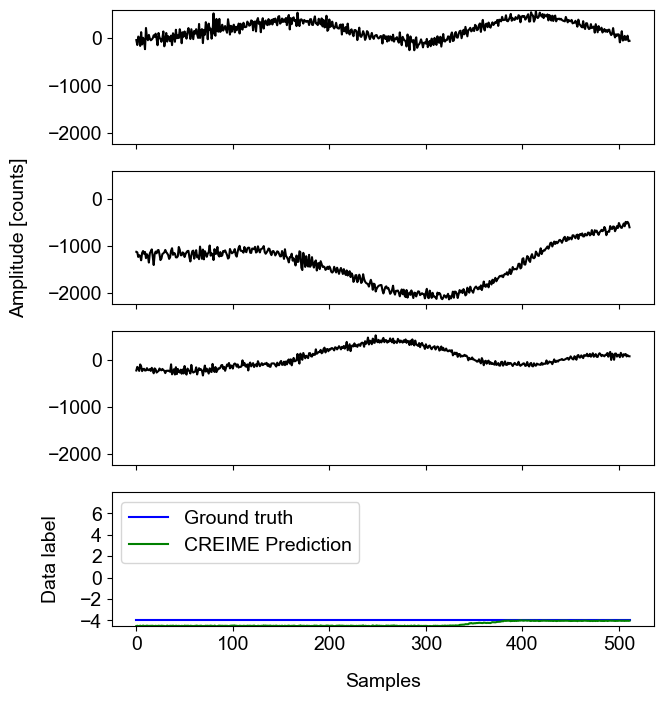

In [18]:
plot_creime_data(X[10], y[10], y_pred[10])

In [19]:
predictions

[(0, None, None),
 (0, None, None),
 (1, 1.5, 391),
 (1, 0.6, 410),
 (0, None, None),
 (0, None, None),
 (1, 3.7, 396),
 (0, None, None),
 (0, None, None),
 (1, -0.4, 428),
 (0, None, None),
 (0, None, None),
 (1, 3.7, 361),
 (1, 4.3, 350),
 (1, 5.5, 402),
 (0, None, None),
 (1, 4.6, 356),
 (1, 3.8, 407),
 (1, 3.4, 346),
 (1, 0.3, 409)]

## (3) Retraining

In [20]:
X, y = stead.get_creime_data(stead.trace_list()[-2000:])

100%|██████████| 2000/2000 [00:15<00:00, 125.71it/s]


In [21]:
model = creime.get_model(untrained = True)

In [22]:
model.fit(X,y, epochs = 10)

Epoch 1/10
52/52 [==============================] - 7s 62ms/step - loss: 0.9829
Epoch 2/10
52/52 [==============================] - 3s 63ms/step - loss: 0.5462
Epoch 3/10
52/52 [==============================] - 3s 61ms/step - loss: 0.4153
Epoch 4/10
52/52 [==============================] - 3s 63ms/step - loss: 0.3542
Epoch 5/10
52/52 [==============================] - 3s 61ms/step - loss: 0.3201
Epoch 6/10
52/52 [==============================] - 3s 61ms/step - loss: 0.2902
Epoch 7/10
52/52 [==============================] - 3s 61ms/step - loss: 0.2587
Epoch 8/10
52/52 [==============================] - 3s 61ms/step - loss: 0.2483
Epoch 9/10
52/52 [==============================] - 3s 59ms/step - loss: 0.2302
Epoch 10/10
52/52 [==============================] - 3s 63ms/step - loss: 0.2122
